# Bound Verification

In [3]:
import pickle

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
with open("benchmarks/results/backward_errors.pkl", 'rb') as f:
    d = pickle.load(f)

In [9]:
if False:
    for x in d:
        print(x)
        for s in d[x]:
            print(s)

In [4]:
hist = d[('LQG_nD', 'NpeetEstimator', 5000, 40, 0.9, 'QfunctionFQI')]
hist

[({0, 1, 2, 3, 4, 5, 6, 7}, 0.0, 0.0),
 ({0, 1, 2, 4, 5, 6, 7}, 7.164711401082311e-07, 17.95976584969519),
 ({0, 1, 2, 4, 5, 6}, 5.477904187190047e-07, 79.35314991080675),
 ({0, 1, 4, 5, 6}, 6.18386413910591e-07, 167.32697516418727),
 ({0, 1, 4, 5}, 6.130033233603387e-07, 213.23801919937358),
 ({0, 1, 4}, 0.2816886060621435, 517.6060308282014),
 ({0, 4}, 2.245654026880827, 624.2811111452903),
 ({0}, 58.419383772436774, 737.3329139573507),
 (set(), 97.2890628567698, 800.1356761473131)]

In [5]:
def print_table(hist):
    pre =   r"\begin{tabular}{@{}lcc@{}}" "\n" r"\toprule" "\n" \
            r"\multicolumn{1}{c}{Set of Selected Features} &" "\n" \
            r"$\Enorm{\qpi(\feat)-\hqpi(\feat_S)}{2}{\mu}$ &" "\n" \
            r"Bound   \\ \midrule" "\n"
    post = r"\bottomrule" "\n" "\end{tabular}"
    tab = []
    for t in hist:
        if t[0]:
            S = "$\set{" + ", ".join([f"s_{i}" for i in t[0]]) + "}$"
        else:
            S = "$\emptyset$"
        tab.append(S + " & " + f"{t[1]:10.5g}" + " & " + f"{t[2]:10.5g}" + "\\\\")
    return pre + "\n".join(tab) + post

In [6]:
print(print_table(hist))

\begin{tabular}{@{}lcc@{}}
\toprule
\multicolumn{1}{c}{Set of Selected Features} &
$\Enorm{\qpi(\feat)-\hqpi(\feat_S)}{2}{\mu}$ &
Bound   \\ \midrule
$\set{s_0, s_1, s_2, s_3, s_4, s_5, s_6, s_7}$ &          0 &          0\\
$\set{s_0, s_1, s_2, s_4, s_5, s_6, s_7}$ & 7.1647e-07 &      17.96\\
$\set{s_0, s_1, s_2, s_4, s_5, s_6}$ & 5.4779e-07 &     79.353\\
$\set{s_0, s_1, s_4, s_5, s_6}$ & 6.1839e-07 &     167.33\\
$\set{s_0, s_1, s_4, s_5}$ &   6.13e-07 &     213.24\\
$\set{s_0, s_1, s_4}$ &    0.28169 &     517.61\\
$\set{s_0, s_4}$ &     2.2457 &     624.28\\
$\set{s_0}$ &     58.419 &     737.33\\
$\emptyset$ &     97.289 &     800.14\\\bottomrule
\end{tabular}


In [7]:
def plot_table(hist):
    fig = plt.figure(figsize=(9,5))
    ax = plt.subplot(111)
    y = np.array(list(map(lambda t: t[1], hist)))
    x = np.arange(len(y))
    ax.step(x, y, where='mid', label="True Estimation", marker="x")
    y = np.array(list(map(lambda t: t[2], hist)))
    ax.step(x, y, where='mid', label="Bound", marker="o")
    ax.legend()
    plt.xlabel("Number of Features Removed")
    plt.ylabel("Value error")
    plt.title("Bound Verification")
    plt.show()
    return fig

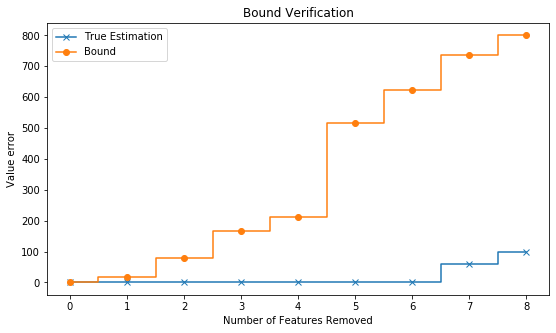

In [8]:
fig = plot_table(hist)

In [9]:
fig.savefig("images/bound-verification.png")

In [27]:
def print_tables(ks, d):
    tabs = []
    for m in ks:
        env, _, n, k, gamma, _ = m
        if env == 'LQG_nD':
            env = 'LQG'
        elif env == 'LunarLander-v2':
            env = 'LunarLander'
        elif env == 'TaxiUnraveled':
            env = 'CustomTaxi'
        pre =   r"\begin{table}" "\n" \
                r"\centering" "\n" \
                r"\begin{tabular}{@{}lcc@{}}" "\n" r"\toprule" "\n" \
                r"\multicolumn{1}{c}{Set of Selected Features} &" "\n" \
                r"$\Enorm{\qpi(\feat)-\hqpi(\feat_S)}{2}{\mu}$ &" "\n" \
                r"Bound   \\ \midrule" "\n"
        post =  r"\bottomrule" "\n" "\end{tabular}" "\n" \
                r"\caption{Verification of upper bound. Backward FS on " f"{env}" " environment" "\n" \
                r"using bound in \cref{eq:final-bound}, tested with $\gamma=" f"{gamma}," "\n" \
                f"n={n},k={k}$.}}" "\n" \
                r"\end{table}"
        tab = []
        for t in d[m]:
            if t[0]:
                S = "$\set{" + ", ".join([f"f_{i}" for i in t[0]]) + "}$"
            else:
                S = "$\emptyset$"
            tab.append(S + " & " + f"{t[1]:10.5g}" + " & " + f"{t[2]:10.5g}" + "\\\\")
        tabs.append(pre + "\n".join(tab) + post)
    return "\n\n".join(tabs)

In [28]:
ks = [('LQG_nD', 'NpeetEstimator', 500, 20, 0.5, 'QfunctionFQI'),
     ('LQG_nD', 'NpeetEstimator', 1000, 40, 0.9, 'QfunctionFQI'),
     ('LQG_nD', 'NpeetEstimator', 5000, 40, 0.95, 'QfunctionFQI'),
     ('LunarLander-v2', 'NpeetEstimator', 500, 20, 0.5, 'QfunctionFQI'),
     ('LunarLander-v2', 'NpeetEstimator', 1000, 40, 0.9, 'QfunctionFQI'),
     ('LunarLander-v2', 'NpeetEstimator', 5000, 40, 0.95, 'QfunctionFQI'),
     ('TaxiUnraveled', 'NpeetEstimator', 500, 20, 0.5, 'QfunctionFQI'),
     ('TaxiUnraveled', 'NpeetEstimator', 1000, 40, 0.9, 'QfunctionFQI'),
     ('TaxiUnraveled', 'NpeetEstimator', 5000, 40, 0.95, 'QfunctionFQI')]
print(print_tables(ks, d))

\begin{table}
\centering
\begin{tabular}{@{}lcc@{}}
\toprule
\multicolumn{1}{c}{Set of Selected Features} &
$\Enorm{\qpi(\feat)-\hqpi(\feat_S)}{2}{\mu}$ &
Bound   \\ \midrule
$\set{f_0, f_1, f_2, f_3, f_4, f_5, f_6, f_7}$ &          0 &          0\\
$\set{f_0, f_1, f_3, f_4, f_5, f_6, f_7}$ & 5.0223e-07 &   0.037976\\
$\set{f_0, f_1, f_3, f_4, f_5, f_7}$ & 3.9091e-07 &     5.4884\\
$\set{f_0, f_1, f_4, f_5, f_7}$ & 3.8924e-07 &     13.548\\
$\set{f_0, f_1, f_4, f_5}$ & 4.5416e-07 &     46.459\\
$\set{f_0, f_1, f_5}$ &  6.036e-07 &     121.71\\
$\set{f_0, f_1}$ &     2.1876 &        179\\
$\set{f_0}$ &     7.8781 &     242.55\\
$\emptyset$ &     39.937 &     282.19\\\bottomrule
\end{tabular}
\caption{Verification of upper bound. Backward FS on LQG environment
using bound in \cref{eq:final-bound}, tested with $\gamma=0.5,
n=500,k=20$.}
\end{table}

\begin{table}
\centering
\begin{tabular}{@{}lcc@{}}
\toprule
\multicolumn{1}{c}{Set of Selected Features} &
$\Enorm{\qpi(\feat)-\hqpi(\feat_S